## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from pandas_datareader import DataReader
import pandas_datareader as dr

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Select dates and stock

In [2]:
start_date = datetime(2010, 1, 1)
end_date = datetime(2023, 6, 25)

In [3]:
stocks = ['AAPL']

## Get data from yahoo finance

In [4]:
import yfinance as yf

df = yf.download(stocks, start_date, end_date, group_by='column')
df
df.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed


## plot the adjusted close column

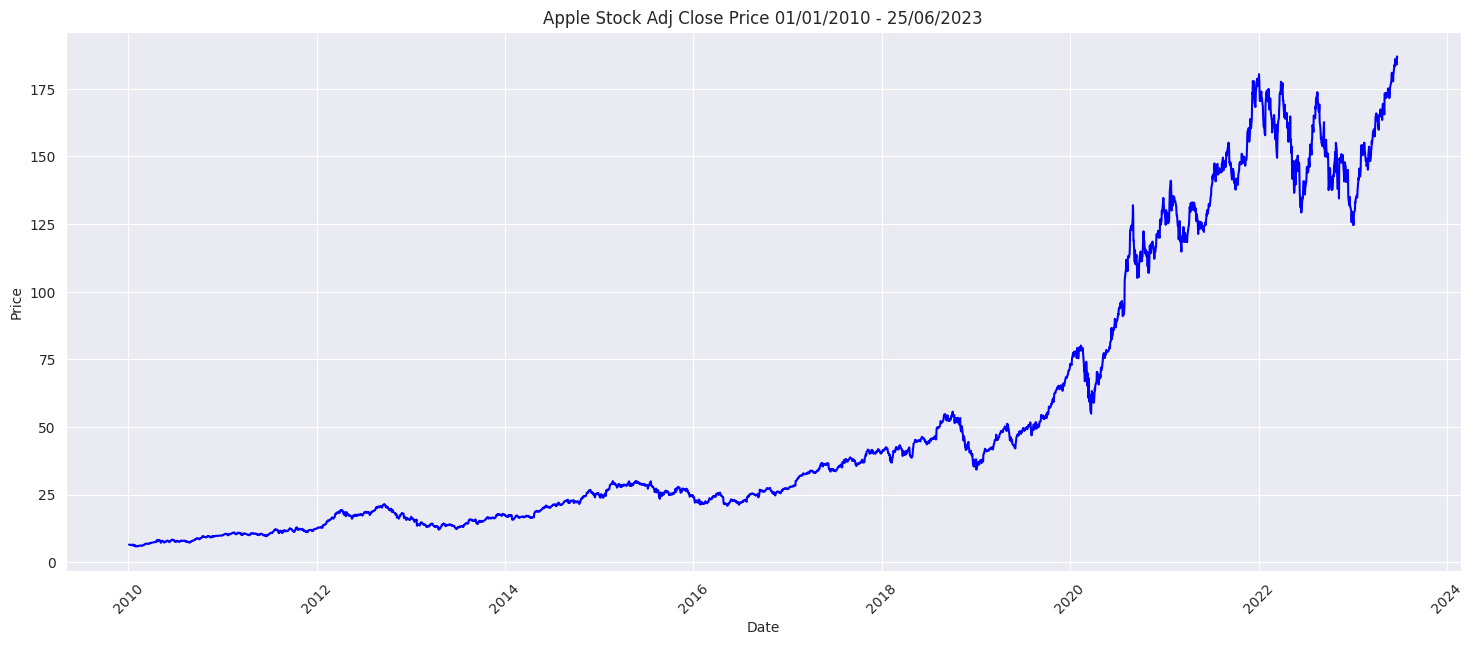

In [6]:
import matplotlib.pyplot as plt



plt.figure(figsize=(18, 7))
plt.plot(df['Date'], df['Adj Close'], color='blue')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Apple Stock Adj Close Price 01/01/2010 - 25/06/2023')

plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better readability

plt.show()


<Figure size 1800x700 with 0 Axes>

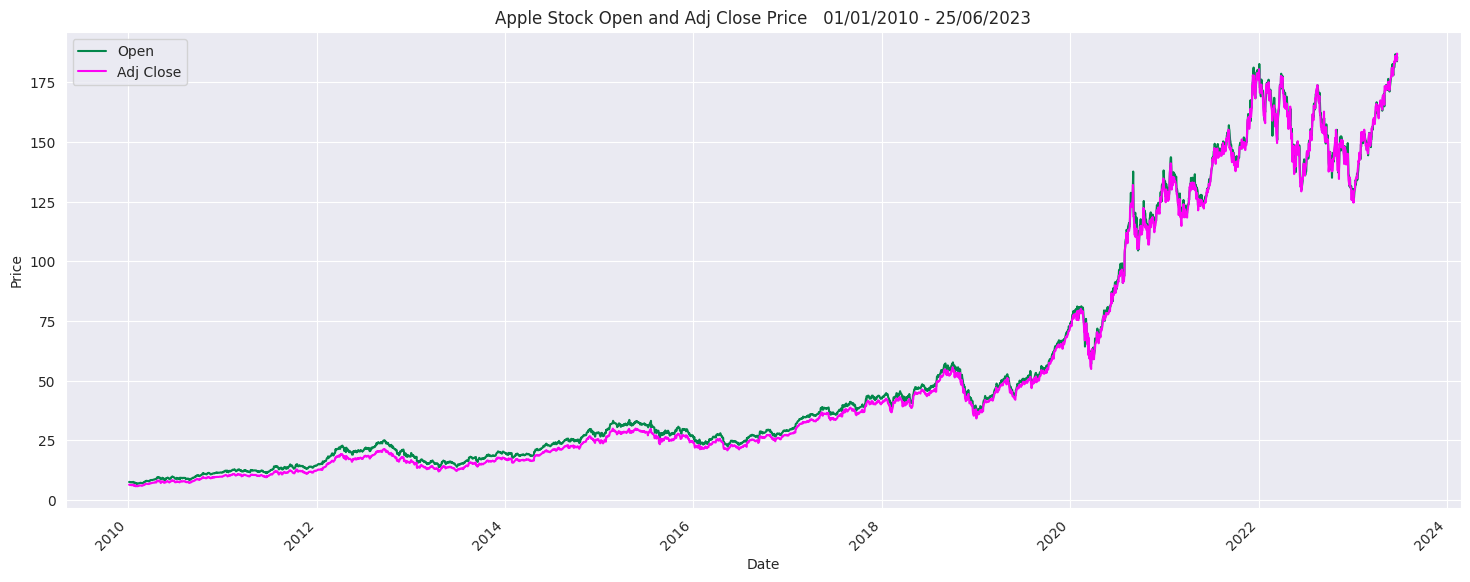

In [7]:
import matplotlib.pyplot as plt

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

plt.figure(figsize=(18, 7))
df[['Open', 'Adj Close']].plot(figsize=(18, 7), legend=True, color=('#03874b', '#fc03f4'))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Apple Stock Open and Adj Close Price   01/01/2010 - 25/06/2023')

plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better readability

plt.show()


## Plot the adjusted close and the open columns

## Plot the volume

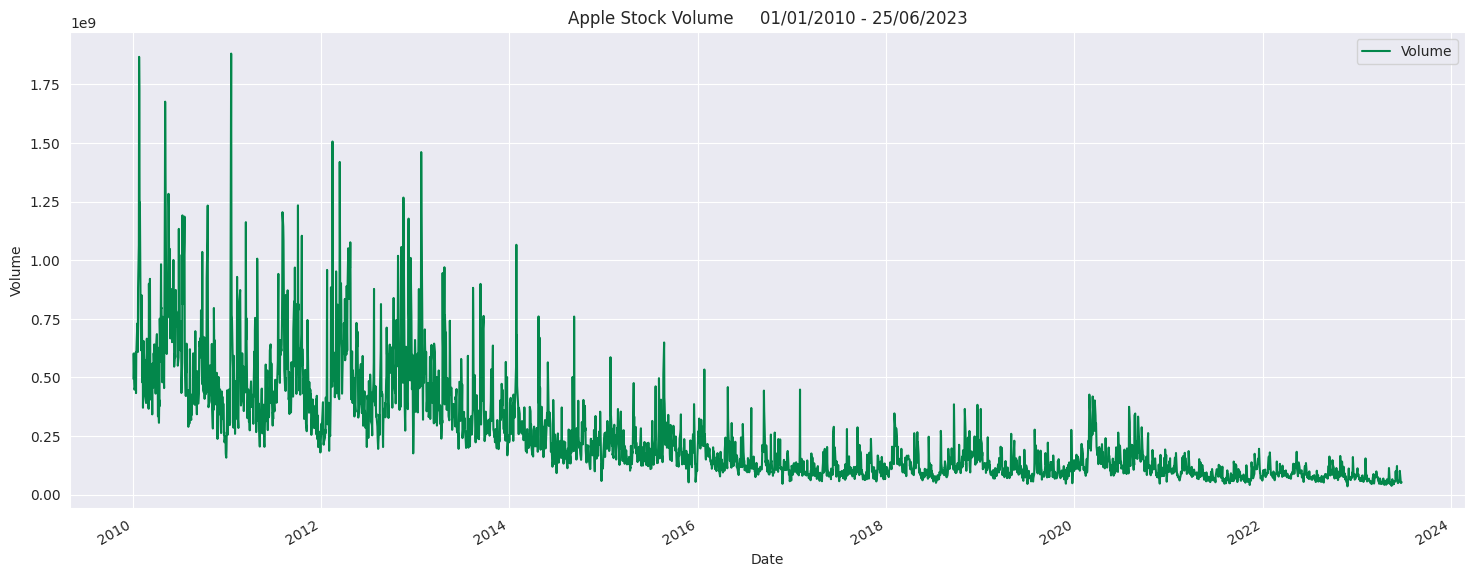

In [8]:
df['Volume'].plot(figsize=(18,7),legend=True,color=('#03874b'))
plt.ylabel('Volume')
plt.title('Apple Stock Volume     01/01/2010 - 25/06/2023');

## Rolling averages

In [9]:
ma_day = [10,20,50]

for ma in ma_day:
    column_names = 'MA for %s Days'%str(ma)
    df[column_names] = df['Adj Close'].rolling(window=ma).mean()

df.head(50)

,Open,High,Low,Close,Adj Close,Volume,MA for 10 Days,MA for 20 Days,MA for 50 Days
Date,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496293,493729600,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800,NaN,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000,NaN,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200,NaN,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800,NaN,NaN,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.377910,462229600,NaN,NaN,NaN
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.305359,594459600,NaN,NaN,NaN
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.394300,605892000,NaN,NaN,NaN
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.357268,432894000,NaN,NaN,NaN


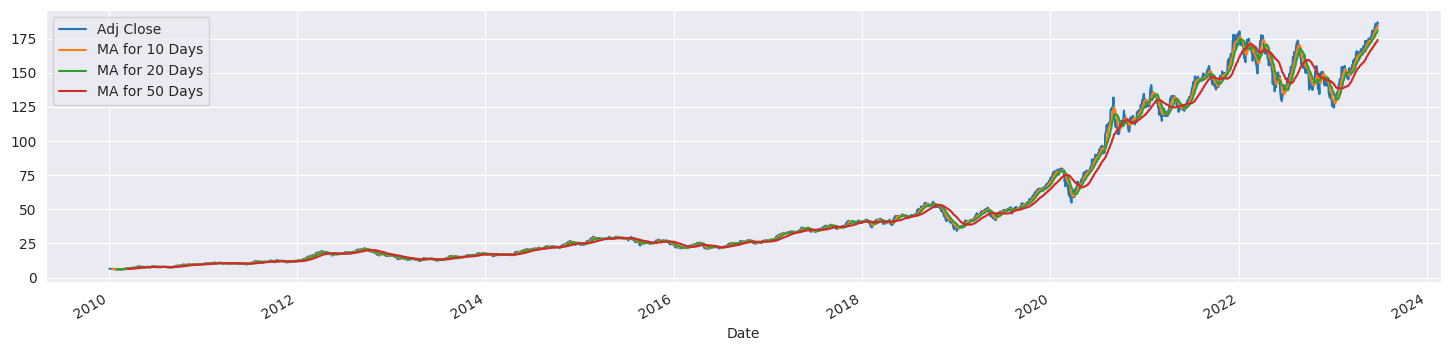

In [10]:
df[['Adj Close','MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(figsize=(18,4));

## Calculate the daily return

In [11]:
df['Daily_Return'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 Days,MA for 20 Days,MA for 50 Days,Daily_Return
Date,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496293,493729600,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800,NaN,NaN,NaN,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000,NaN,NaN,NaN,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200,NaN,NaN,NaN,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800,NaN,NaN,NaN,0.006648


## Plot the daily return

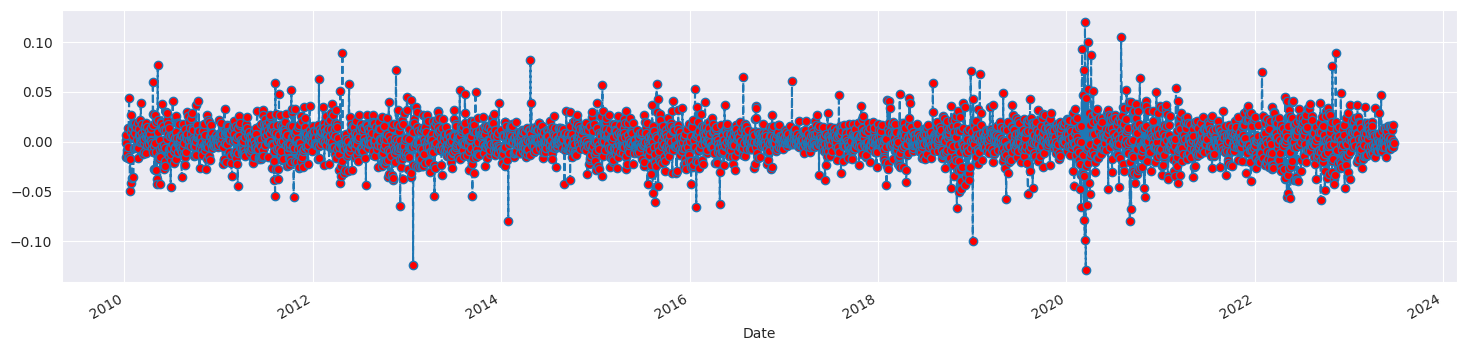

In [12]:
df['Daily_Return'].plot(figsize=(18,4), linestyle='--', marker='o', markerfacecolor='red',
                       markersize=6);

## Check the distribution plot of the daily return (without nulls)

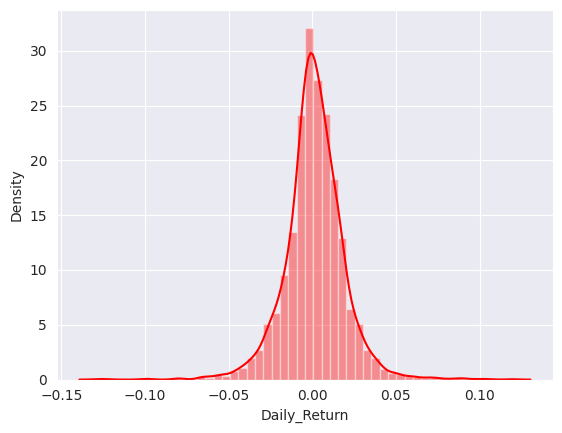

In [13]:
sns.distplot(df['Daily_Return'].dropna(),bins=50, color='red');

___
# ARIMA

## Imports

In [15]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.3 MB/s eta 0:00:00


In [16]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

from pmdarima import auto_arima

## Create a data frame for the adjusted close only

In [17]:
df = pd.DataFrame(data=df['Adj Close'])
df

,Adj Close
Date,
2010-01-04,6.496293
2010-01-05,6.507526
2010-01-06,6.404015
2010-01-07,6.392177
2010-01-08,6.434673
...,...
2023-06-16,184.919998
2023-06-20,185.009995
2023-06-21,183.960007


## Split the data (30% test size) and plot the data

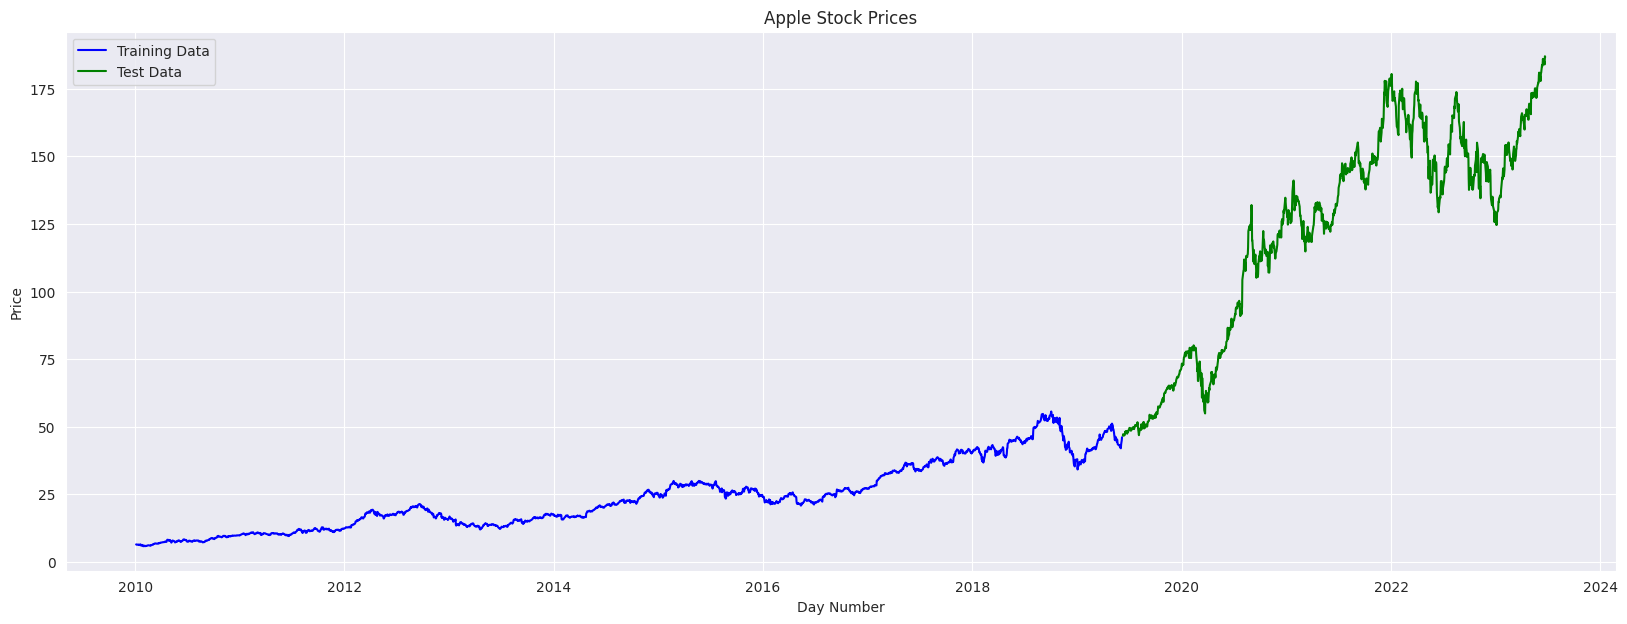

In [18]:
train, test = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

plt.figure(figsize=(20,7))
plt.title('Apple Stock Prices')
plt.xlabel('Day Number')
plt.ylabel('Price')
plt.plot(train, 'blue', label='Training Data')
plt.plot(test, 'green', label = 'Test Data')
plt.legend();

## Find the best model

In [19]:
stepwise_fit = auto_arima(df, start_p=0, max_p=6,
                          start_q=0, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11988.755, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11981.829, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11981.204, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11991.520, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11979.042, Time=3.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11985.481, Time=2.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11980.572, Time=1.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11979.553, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11980.233, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11982.826, Time=1.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11982.918, Time=0.54 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.864 seconds


In [20]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3391
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5985.521
Date:                Mon, 03 Jul 2023   AIC                          11979.042
Time:                        19:33:12   BIC                          12003.556
Sample:                             0   HQIC                         11987.805
                               - 3391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0301      0.014      2.088      0.037       0.002       0.058
ar.L1          0.4341      0.102      4.263      0.000       0.234       0.634
ma.L1         -0.4914      0.099     -4.944      0.000      -0.686      -0.297
sigma2         2.0005      0.019    107.069      0.000       1.964       2.037
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             20299.94
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              96.18   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecast prices

In [22]:
!pip install statsmodels

In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

train_values = train.values
test_values = test.values

history = [x for x in train_values]
predictions = []

for t in range(len(test_values)):
    model = sm.tsa.ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_values[t]
    history.append(obs)
    print("predicted = %f, expected = %f" % (yhat, obs))


predicted = 46.141760, expected = 46.711372
predicted = 46.722061, expected = 47.252262
predicted = 47.262462, expected = 47.101871
predicted = 47.099066, expected = 47.092175
predicted = 47.091994, expected = 46.750168
predicted = 46.743784, expected = 47.029114
predicted = 47.034258, expected = 48.135170
predicted = 48.156353, expected = 47.994484
predicted = 47.991848, expected = 48.380154
predicted = 48.387332, expected = 48.215206
predicted = 48.212161, expected = 48.166702
predicted = 48.165806, expected = 47.436607
predicted = 47.423058, expected = 48.462616
predicted = 48.479863, expected = 48.448071
predicted = 48.447827, expected = 48.006615
predicted = 47.999220, expected = 48.887089
predicted = 48.901044, expected = 49.173302
predicted = 49.177995, expected = 49.580803
predicted = 49.587593, expected = 49.537140
predicted = 49.536414, expected = 48.515987
predicted = 48.498915, expected = 48.811897
predicted = 48.816628, expected = 49.294582
predicted = 49.302455, expected 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 70.773849, expected = 65.155159
predicted = 65.245130, expected = 69.847748
predicted = 69.601855, expected = 67.421890
predicted = 67.582948, expected = 60.763676
predicted = 61.056275, expected = 68.043663
predicted = 67.290335, expected = 59.290054
predicted = 60.806937, expected = 61.897038
predicted = 61.417980, expected = 60.381794
predicted = 60.664694, expected = 59.919155
predicted = 60.004963, expected = 56.115154
predicted = 56.813260, expected = 54.923035
predicted = 55.132641, expected = 60.433216
predicted = 59.427250, expected = 60.100300
predicted = 60.159801, expected = 63.262955
predicted = 62.694323, expected = 60.643734
predicted = 61.132049, expected = 62.374374
predicted = 62.045997, expected = 62.247089
predicted = 62.271196, expected = 58.971825
predicted = 59.590734, expected = 59.955875
predicted = 59.768745, expected = 59.094219
predicted = 59.258648, expected = 64.249435
predicted = 63.243488, expected = 63.505291
predicted = 63.649518, expected 

## Evaluate on the test set

In [26]:
error = mean_squared_error(test_values, predictions)
print('Testing MSE for Apple stock: %.3f' % error)

Testing MSE for Apple stock: 6.284


In [28]:
test.mean()

Adj Close    122.223123
dtype: float64

## Plot the forecast

In [29]:
test['predictions'] = predictions
test

,Adj Close,predictions
Date,,
2019-06-10,46.711372,46.141760
2019-06-11,47.252262,46.722061
2019-06-12,47.101871,47.262462
2019-06-13,47.092175,47.099066
2019-06-14,46.750168,47.091994
...,...,...
2023-06-16,184.919998,185.909189
2023-06-20,185.009995,184.973663
2023-06-21,183.960007,185.005563


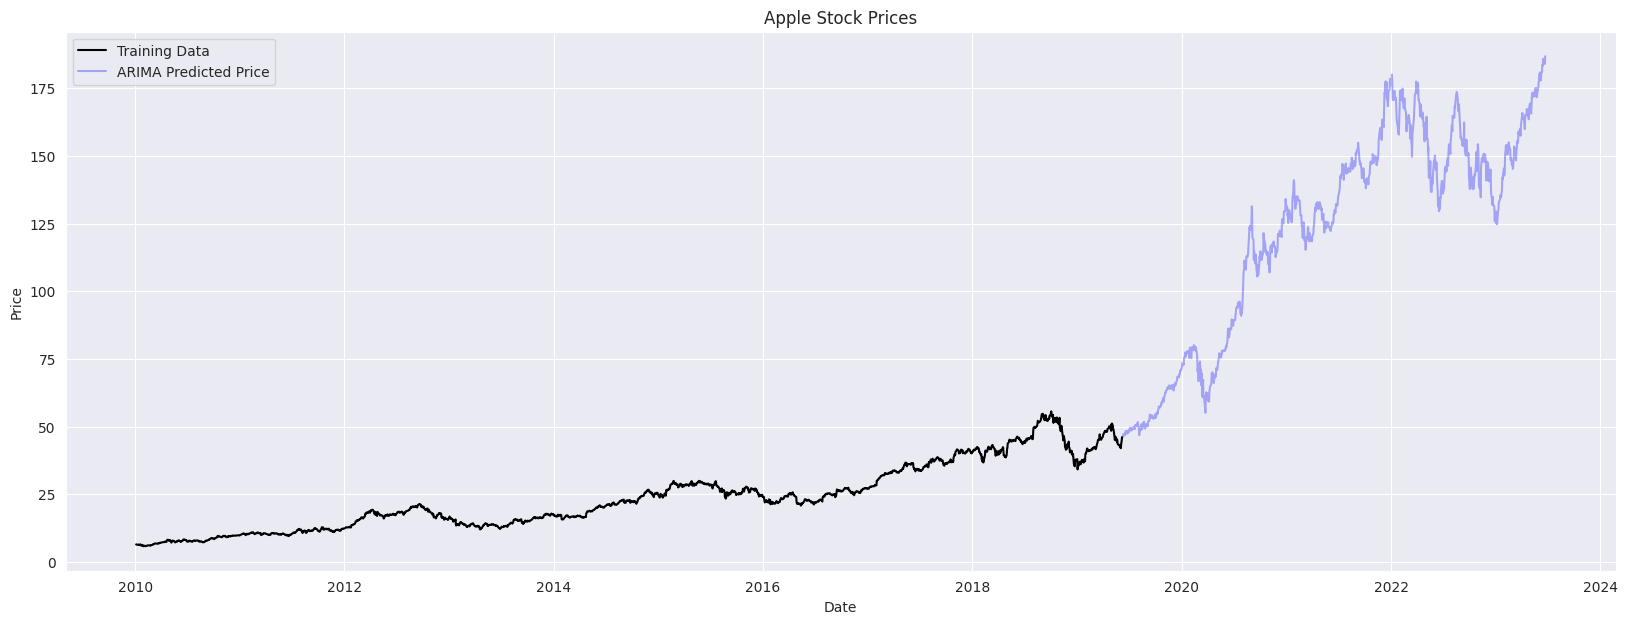

In [30]:
plt.figure(figsize=(20,7))
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train, 'black', label='Training Data')
plt.plot(test['predictions'], 'blue', alpha = 0.3, label = 'ARIMA Predicted Price')
plt.legend();

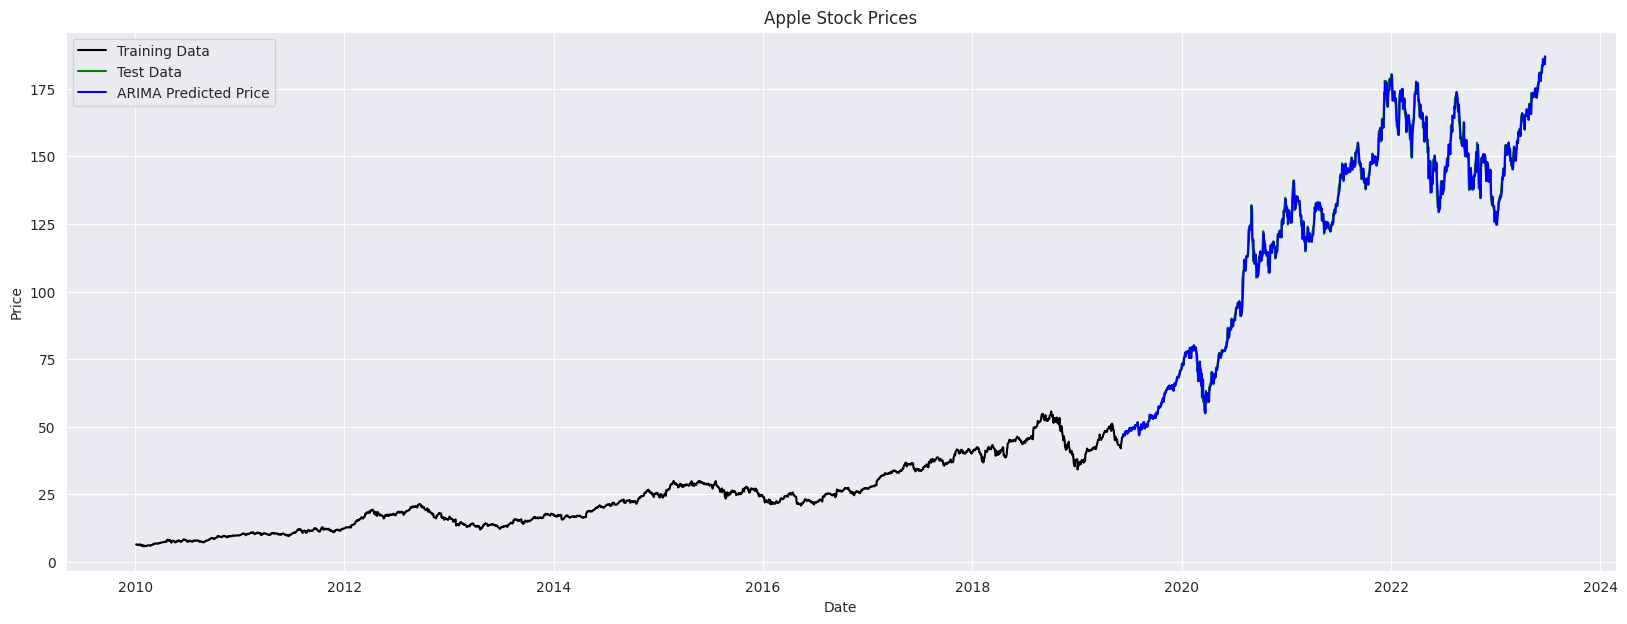

In [31]:
plt.figure(figsize=(20,7))
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train, 'black', label='Training Data')
plt.plot(test['Adj Close'], 'green', label = 'Test Data')
plt.plot(test['predictions'], 'blue', label = 'ARIMA Predicted Price')
plt.legend();

## Plot the test set and predictions

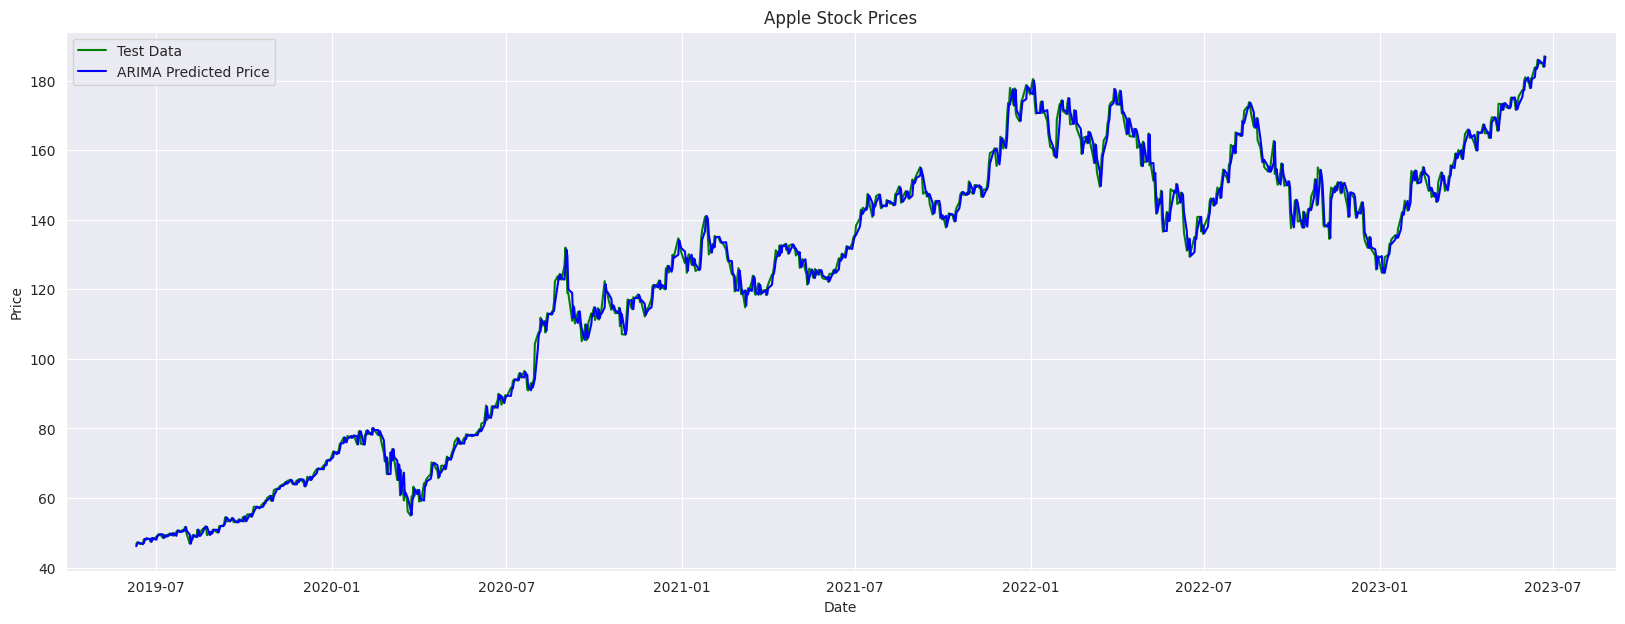

In [32]:
plt.figure(figsize=(20,7))
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(test['Adj Close'], 'green', label = 'Test Data')
plt.plot(test['predictions'], 'blue', label = 'ARIMA Predicted Price')
plt.legend();

## Facebook Prophet

In [45]:
!pip install pystan

  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.19.0-py3-none-any.whl (49 kB)
  Using cached webargs-8.2.0-py3-none-any.whl (30 kB)


In [46]:
!pip install numpy pandas matplotlib

In [47]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [49]:
df = yf.download(stocks, start_date, end_date, group_by='column')
df.reset_index(level=0, inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496293,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [50]:
df = pd.DataFrame(data=df[['Date','Adj Close']])
df.head(2)

,Date,Adj Close
0,2010-01-04,6.496293
1,2010-01-05,6.507527


In [51]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head(2)

,ds,y
0,2010-01-04,6.496293
1,2010-01-05,6.507527


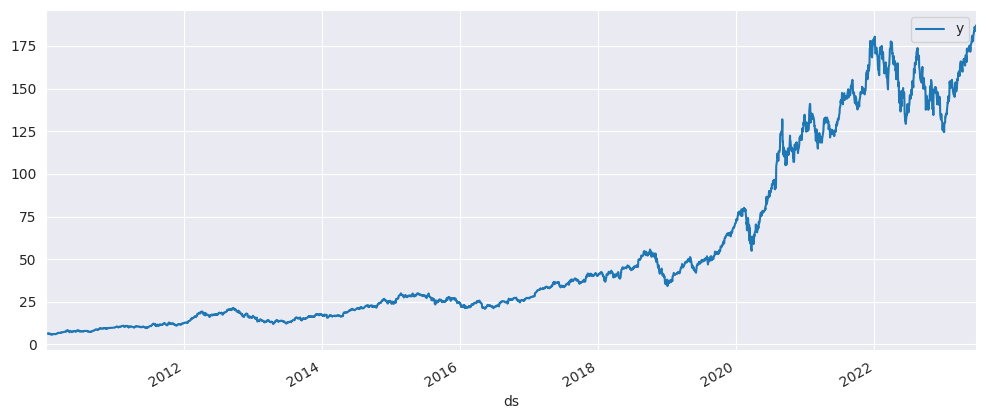

In [52]:
pd.plotting.register_matplotlib_converters()
df.plot(x='ds',y='y',figsize=(12,5)).autoscale(axis='x', tight=True);

## Split the data (30% test size) and plot the data

In [53]:
train, test = df[0:int(len(df)-60)], df[int(len(df)-60):]

In [54]:
len(test)

60

In [55]:
from fbprophet import Prophet

# Create the model
m = Prophet().fit(train)

# Step 1 - Create a "future" placeholder dataframe
# NOTE - Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data.
# For more info: https://facebook.github.io/prophet/docs/non-daily_data.html
future = m.make_future_dataframe(periods=len(test), freq='D')
future = future[future['ds'].isin(df['ds'])]

# Step 2 - Predict and fill in the future
forecast = m.predict(future)


ModuleNotFoundError: ignored

In [56]:
# create the model
m = Prophet().fit(train)

# step 1 - create a "future" placeholder dataframe.
# NOTE - prophet by default is for daily data. you need to pass a frequency for sub-daily or monthly data.
# for more info: https://facebook.github.io/prophet/docs/non-daily_data.html
future = m.make_future_dataframe(periods=len(test), freq='D')
future = future[future['ds'].isin(df['ds'])]

# step 2 - predict and fill in the future
forecast = m.predict(future)

NameError: ignored

In [ ]:
forecast.tail()

In [ ]:
test.tail()

In [ ]:
ax = forecast.plot(x='ds', y='yhat', label='predictions',legend=True, figsize=(12,5),color='red')
test.plot(x='ds', y='y', label='true test data', legend=True, ax=ax, xlim=('2021-07-01','2021-11-01'),color='black');

In [ ]:
# Evaluation

from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-(len(test)):]['yhat']
predictions

In [ ]:
test['y']

In [ ]:
rmse(predictions,test['y'])

In [ ]:
test.mean()

In [ ]:
# Prophet built-in Diagnostics

from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# when running cross validation metric, we need to define 3 things:
# 1. initial training period
# 2. the period length that we're going to perform cross validation for
# 3. the horizon of period for each fold

# Inintial 60 training period
initial = 1 * 60
initial = str(initial) + ' days'

# Fold every 60 days
period = 1 * 60
period = str(period) + ' days'

# Forecast 60 days into the future
horizon = 60
horizon = str(horizon) + ' days'

# IT HAS TO BE IN THIS EXACT FORMAT

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

In [ ]:
df_cv.head()

In [ ]:
performance_metrics(df_cv)

# this tells us for each horizon period, what the stats or evaluation metrics are.
# mape = mean absolute percentage error

In [ ]:
# Cross Validation Plot

plot_cross_validation_metric(df_cv, metric='rmse');

### Retrain the model on full data and forecast to the future

In [ ]:
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=len(test), freq='D')
forecast = m.predict(future)

In [ ]:
forecast.tail()

In [ ]:
df.tail()

In [ ]:
m.plot(forecast);

In [ ]:
m.plot(forecast);
plt.xlim('2021-01-01', '2023-05-01');